## Student Information
Name: Alapati Rick Minute Taupo

Student ID: 107065422

GitHub ID: tu8ankid

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

---
## Part 1: Take Home Exercises

In [1]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups# categories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline


import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### >>> **Exercise 1 (5 min):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
# Answer here
for t in twenty_train.target[:3]:
    print("\n".join(twenty_train.data[t].split("\n")))

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv domain, i.e  the mesh is a 
	mapping of a 3d Bezier patch into 2d. The area in this domain
	which is inside a trimming loop had to be rendered. The trimming
	loop is a set of 2d Bezier curve segments.
	For the sake of notation: the mesh is made up of cells.

	My problem is this :
	The trimming area has to be split up into individual smaller
	cells bounded by the trimming curve segments. If a cell
	is wholly inside the area...then it is output as a whole ,
	else it is trivially rejected. 

	Does any body know how thiss can be done, or is there any algo. 
	somewhere for doing this.

	Any help would be appreciated.

	Thanks, 
	Ani.
-- 
To get irritated is human, to stay cool, divi

In [3]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
# Answer here
X[::100]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
100,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism
200,From: johnsd2@rpi.edu (Dan Johnson) Subject: R...,3,soc.religion.christian
300,Subject: Re: Yet more Rushdie [Re: ISLAMIC LAW...,0,alt.atheism
400,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1,comp.graphics
500,From: qpliu@phoenix.Princeton.EDU (q.p.liu) Su...,0,alt.atheism
600,"From: ""Robert Knowles"" <p00261@psilink.com> Su...",0,alt.atheism
700,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism
800,From: JJMARVIN@pucc.princeton.edu Subject: pra...,3,soc.religion.christian
900,From: pes@hutcs.cs.hut.fi (Pekka Siltanen) Sub...,1,comp.graphics


---

### >>> **Exercise 3 (5 min):** 
Try to fecth records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [5]:
# Answer here
X.query('category == "2"')[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [6]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
5       (The amount of missing records is: , 0)
6       (The amount of missing records is: , 0)
7       (The amount of missing records is: , 0)
8       (The amount of missing records is: , 0)
9       (The amount of missing records is: , 0)
10      (The amount of missing records is: , 0)
11      (The amount of missing records is: , 0)
12      (The amount of missing records is: , 0)
13      (The amount of missing records is: , 0)
14      (The amount of missing records is: , 0)
15      (The amount of missing records is: , 0)
16      (The amount of missing records is: , 0)
17      (The amount of missing records is: , 0)
18      (The amount of missing records is: , 0)
19      (The amount of missing records is: , 0)
20      (The amount of missing records i

----

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### >>> **Exercise 5 Answer:** 
Tuples 2, 3 and 5 contain what appear to be blanks/nulls. However, they actually contain string data ['NaN','None','']. To remedy this, we simply replace these values with true null values using replace and np.nan

In [9]:
# Answer here
NA_df = NA_df.replace(['NaN','None',''],np.nan)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

----

In [10]:
X_sample = X.sample(n=1000)

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Answer:
Sampled tuples seclection was random. The remaining tuples were shuffled as can be seen in the index column.

In [11]:
# Answer here

X_sample

,text,category,category_name
1431,From: rcfec@westminster.ac.uk (James Holland) ...,3,soc.religion.christian
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism
217,From: erich@fi.gs.com (Erich Schlaikjer) Subje...,1,comp.graphics
1616,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1135,From: DEHP@calvin.edu (Phil de Haan) Subject: ...,2,sci.med
1137,From: dfitts@carson.u.washington.edu (Douglas ...,2,sci.med
1023,Subject: Re: Ancient islamic rituals From: liv...,0,alt.atheism
283,From: tcsteven@iaserv.b1.ingr.com (Todd Steven...,3,soc.religion.christian
1467,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...,3,soc.religion.christian
777,From: xz775327@longs.LANCE.ColoState.Edu (Xia ...,1,comp.graphics


----

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sci.med                   278
soc.religion.christian    276
comp.graphics             257
alt.atheism               189
Name: category_name, dtype: int64


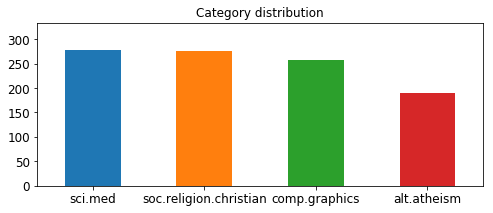

In [12]:
# Answer here
print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts()\
        .plot(kind = 'bar',
              title = 'Category distribution',
              ylim = [0, max(X_sample.category_name.value_counts())*1.2],
              rot = 0, fontsize = 12, figsize = (8,3))

----

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

                        Population  Sample
soc.religion.christian         599     276
sci.med                        594     278
comp.graphics                  584     257
alt.atheism                    480     189


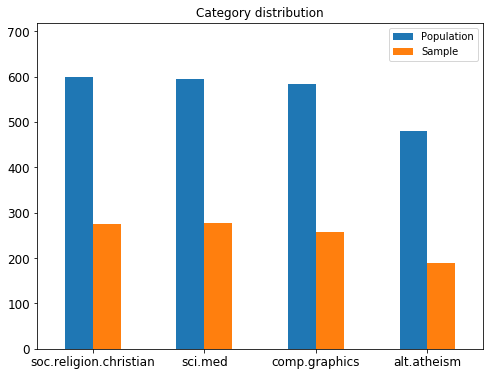

In [13]:
#merge X and X_sample frequency tables into one
dfbar = pd.DataFrame({'Population':X.category_name.value_counts().sort_index(),
                      'Sample':X_sample.category_name.value_counts().sort_index()})

#display new dataframe sorted by Population attribute
print(dfbar.sort_values('Population', ascending=False))

#plot sorted dataframe onto bar graph
dfbar.sort_values('Population', ascending=False)\
     .plot(kind = 'bar', 
           title = 'Category distribution', 
           ylim = [0, max(X.category_name.value_counts())*1.2], 
           rot = 0, fontsize = 12, figsize = (8,6))

----

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [14]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[0:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

----

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

### **>>> Answer:**
Focus on fifth record showing only the instances of 1 from the same selection as above to get the index with the following line of code:

In [15]:
print(X_counts[4:5,0:100])

  (0, 37)	1
  (0, 0)	1


The two indexes are found to be 0 (already known) and 37 (the second one we are looking for).  Now we display the feature name with the index 37 with the following line of code:

In [16]:
count_vect.get_feature_names()[37]

'01'

The result found is the '01' term.

----

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [17]:
len(count_vect.get_feature_names())

35788

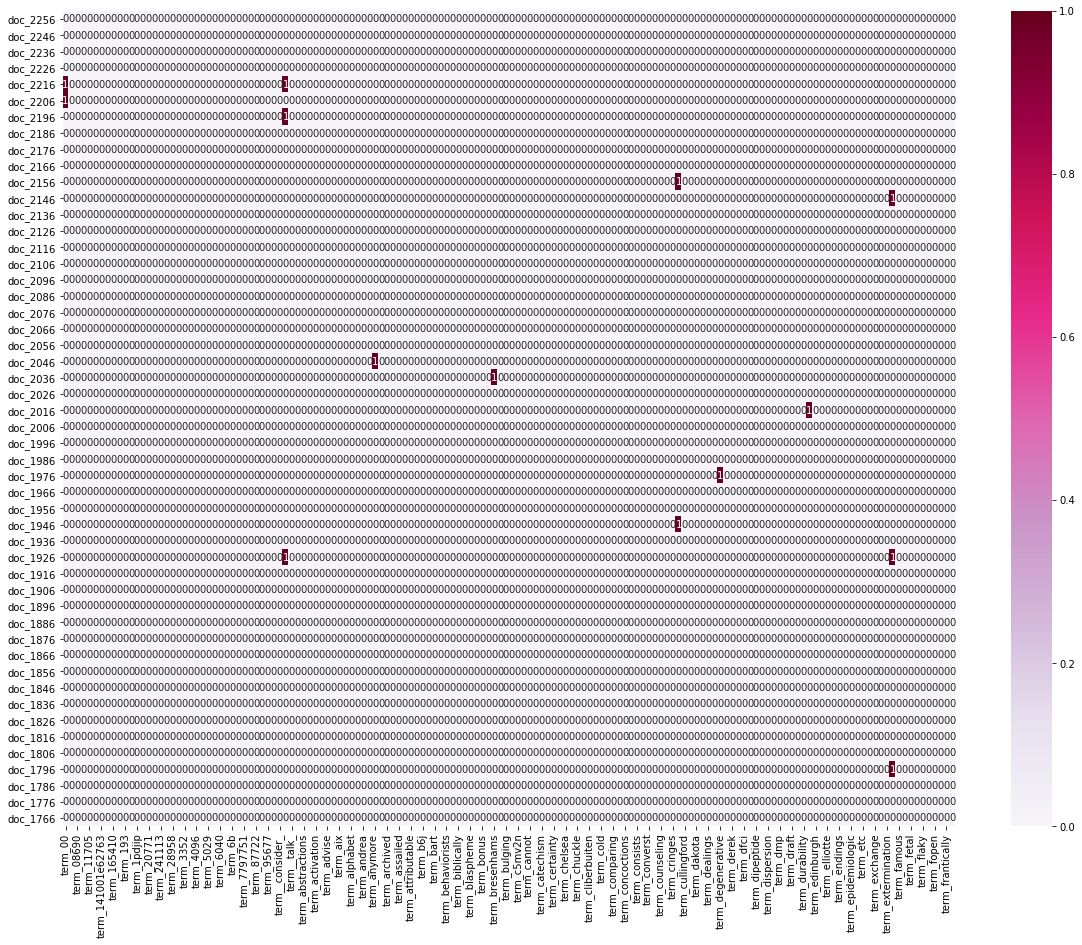

In [18]:
import seaborn as sns

plot_x2 = ["term_"+str(i) for i in count_vect.get_feature_names()[::100][0:150]]
plot_y2 = ["doc_"+ str(i) for i in list(X.index)[::-10][:50]]
plot_z2 = X_counts[0:50, 0:150].toarray()

df_todraw2 = pd.DataFrame(plot_z2, columns = plot_x2, index = plot_y2)
# df_todraw2 = pd.DataFrame(plot_z2, columns = plot_x2, index = plot_y2).sort_values(by='term_00', ascending = False)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw2,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# count_vect.get_feature_names()
# df_todraw2.count_vect()

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

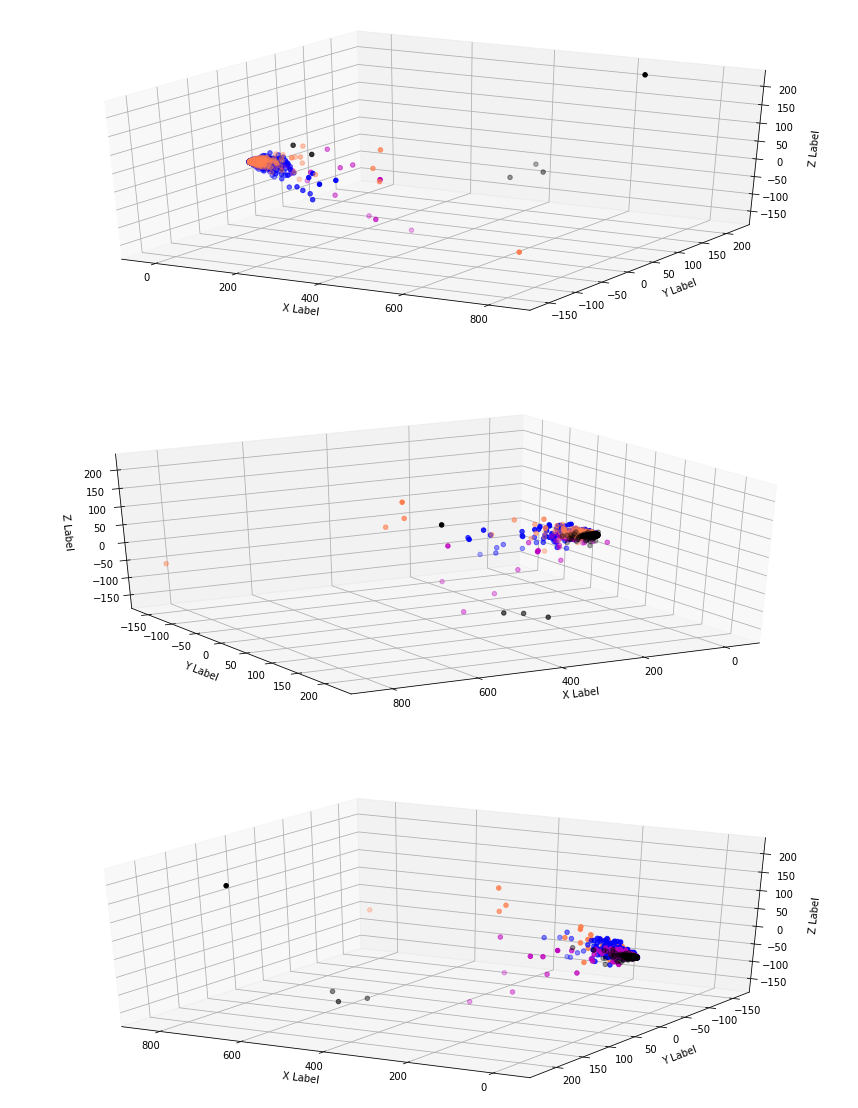

In [19]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (15,20))

ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=30, azim=120)
    
plt.show()

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [20]:
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as pt
pt.set_credentials_file(username='tu8ankid', api_key='S2caxQ19QKVAV43QplNn')

import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/home/pati/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


/home/pati/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [21]:
# Answer here
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as pt
pt.set_credentials_file(username='tu8ankid', api_key='S2caxQ19QKVAV43QplNn')

import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

py.iplot(ta.plot_word_frequency([count_vect.get_feature_names()[::1000], term_frequencies[::1000]], "Term Frequency Distribution"))

/home/pati/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [22]:
dflt = pd.DataFrame(count_vect.get_feature_names(), columns=['Feature'])
dflt['Frequency'] = term_frequencies
dflt.sort_values(by=['Frequency'], ascending=False, inplace=True)
dflt[::500][:20]
# print(count_vect.get_feature_names())
# term_frequencies

,Feature,Frequency
32142,the,29825
11193,dept,163
26179,programming,81
10638,dangerous,54
7896,carefully,39
9802,converted,30
13771,exposure,25
13138,entity,20
11524,differently,17
25848,preferably,15


In [23]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

py.iplot(ta.plot_word_frequency([dflt.Feature[220::200],dflt.Frequency[220::200]], "Term Frequency Distribution"))

/home/pati/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### >>> **Answer:**
No, all bin_category data end up with [0,0,0,0] only.  Binarization does not work effectively with text.


In [24]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [25]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 0, 0]"


---

## Part 2: New Dataset (Lab 1 Operations)

In [26]:
# import Amazon dataset into dataframe dfa
dfa = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=['sentiment','score'])
dfa['source']='Amazon' #tag ## Part 2: New Dataset (Lab 1 Operations)all records as 'Amazon' in the additional 'source' field
dfa[0:5]

,sentiment,score,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon


In [27]:
# import IMDB dataset into dataframe dfi
dfi = pd.read_csv('imdb_labelled.txt', engine='python', sep='  \t', names=['sentiment','score'])
dfi['source']='IMDB' #tag all records as 'IMDB' in the additional 'source' field
dfi[0:25]
# This reveals that data from dfi[19,20] missing lines 21-81 of txt

,sentiment,score,source
0,"A very, very, very slow-moving, aimless movie ...",0,IMDB
1,Not sure who was more lost - the flat characte...,0,IMDB
2,Attempting artiness with black & white and cle...,0,IMDB
3,Very little music or anything to speak of.,0,IMDB
4,The best scene in the movie was when Gerardo i...,1,IMDB
5,"The rest of the movie lacks art, charm, meanin...",0,IMDB
6,Wasted two hours.,0,IMDB
7,Saw the movie today and thought it was a good ...,1,IMDB
8,A bit predictable.,0,IMDB
9,Loved the casting of Jimmy Buffet as the scien...,1,IMDB


In [28]:
# import Yelp dataset into dataframe dfi
dfy = pd.read_csv('yelp_labelled.txt', sep='\t', names=['sentiment','score'])
dfy['source']='Yelp' #tag all records as 'Yelp' in the additional 'source' field
dfy[0:5]

,sentiment,score,source
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp


In [29]:
# Verify datasets were completely read into dataframes
print(dfa.score.value_counts())
print(dfi.score.value_counts())
print(dfy.score.value_counts())

1    500
0    500
Name: score, dtype: int64
1    500
0    500
Name: score, dtype: int64
1    500
0    500
Name: score, dtype: int64


---

In [30]:
# Combine the 3 dataframes into one
dfx = dfa.append([dfi, dfy], ignore_index=True)

# Verify all data from 3 dataframes were combined successfully
print(dfx.score.value_counts())

1    1500
0    1500
Name: score, dtype: int64


In [31]:
responses = ['Negative','Positive']

# dfx['response'] = dfx.score.apply(lambda t: dmh.format_labels(t, response))

dfx['response'] = np.where(dfx['score']==0, responses[0], responses[1])

dfx

,sentiment,score,source,response
0,So there is no way for me to plug it in here i...,0,Amazon,Negative
1,"Good case, Excellent value.",1,Amazon,Positive
2,Great for the jawbone.,1,Amazon,Positive
3,Tied to charger for conversations lasting more...,0,Amazon,Negative
4,The mic is great.,1,Amazon,Positive
5,I have to jiggle the plug to get it to line up...,0,Amazon,Negative
6,If you have several dozen or several hundred c...,0,Amazon,Negative
7,If you are Razr owner...you must have this!,1,Amazon,Positive
8,"Needless to say, I wasted my money.",0,Amazon,Negative
9,What a waste of money and time!.,0,Amazon,Negative


In [32]:
# Check for nulls
dfx.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment    (The amount of missing records is: , 0)
score        (The amount of missing records is: , 0)
source       (The amount of missing records is: , 0)
response     (The amount of missing records is: , 0)
dtype: object

In [33]:
# Check for duplicate sentiments
dfx[dfx.sentiment.duplicated(keep=False)].sort_values("sentiment")

,sentiment,score,source,response
1788,10/10,1,IMDB,Positive
1125,10/10,1,IMDB,Positive
1363,Definitely worth checking out.,1,IMDB,Positive
1090,Definitely worth checking out.,1,IMDB,Positive
748,Does not fit.,0,Amazon,Negative
446,Does not fit.,0,Amazon,Negative
543,Don't buy this product.,0,Amazon,Negative
180,Don't buy this product.,0,Amazon,Negative
402,Excellent product for the price.,1,Amazon,Positive
892,Excellent product for the price.,1,Amazon,Positive


---

In [34]:
# Create a sample of 1000 records
dfx_sample = dfx.sample(n=1000)
len(dfx_sample)

1000

Amazon    1000
IMDB      1000
Yelp      1000
Name: source, dtype: int64


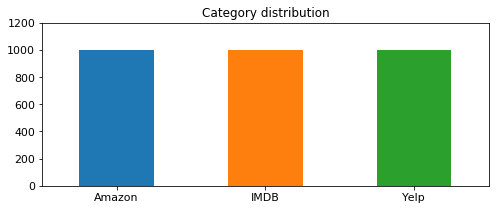

In [35]:
print(dfx.source.value_counts())

# plot barchart for X_sample
dfx.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(dfx.source.value_counts())*1.2],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

IMDB      347
Yelp      329
Amazon    324
Name: source, dtype: int64


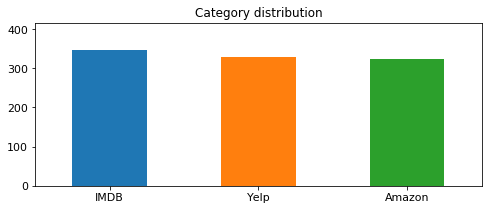

In [36]:
print(dfx_sample.source.value_counts())

# plot barchart for X_sample
dfx_sample.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(dfx_sample.source.value_counts())*1.2],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

        Population  Sample
Amazon        1000     324
IMDB          1000     347
Yelp          1000     329


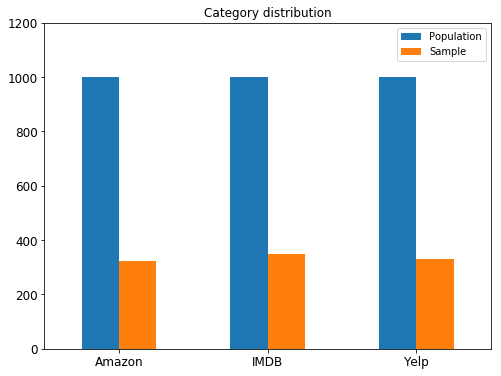

In [37]:
#merge dfx and dfx_sample frequency tables into one
dfbar2 = pd.DataFrame({'Population':dfx.source.value_counts().sort_index(),
                      'Sample':dfx_sample.source.value_counts().sort_index()})

#display new dataframe sorted by Population attribute
print(dfbar2.sort_values('Population', ascending=False))

#plot sorted dataframe onto bar graph
dfbar2.sort_values('Population', ascending=False)\
     .plot(kind = 'bar', 
           title = 'Category distribution', 
           ylim = [0, max(dfx.source.value_counts())*1.2], 
           rot = 0, fontsize = 12, figsize = (8,6))

        Population  Sample
Amazon        1000     324
IMDB          1000     347
Yelp          1000     329


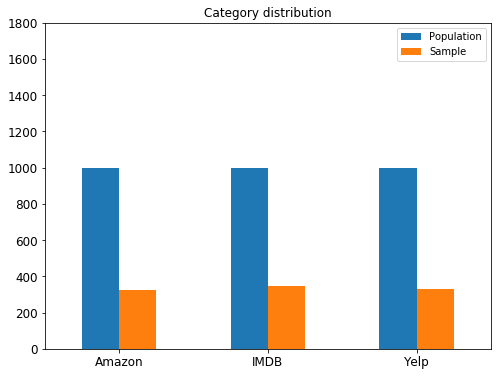

In [38]:
#merge dfx and dfx_sample frequency tables into one
# dfbar2 = pd.DataFrame({'Population':dfx.score.value_counts().sort_index(),
#                       'Sample':dfx_sample.score.value_counts().sort_index()})

#display new dataframe sorted by Population attribute
print(dfbar2.sort_values('Population', ascending=False))

#plot sorted dataframe onto bar graph
dfbar2.sort_values('Population', ascending=False)\
     .plot(kind = 'bar', 
           title = 'Category distribution', 
           ylim = [0, max(dfx.score.value_counts())*1.2], 
           rot = 0, fontsize = 12, figsize = (8,6))

---

In [39]:
dfx['unigrams'] = dfx['sentiment'].apply(lambda x: dmh.tokenize_text(x))
dfx.unigrams[0:4]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [40]:
list(dfx[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [41]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer()
dfx_counts = count_vect.fit_transform(dfx.sentiment)
dfx_counts

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [42]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(dfx[4:5].sentiment)))

['the', 'mic', 'is', 'great']

In [43]:
dfx_counts.shape

(3000, 5155)

In [44]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [45]:
count_vect.get_feature_names()[-10:]

['yucky',
 'yukon',
 'yum',
 'yummy',
 'yun',
 'z500a',
 'zero',
 'zillion',
 'zombie',
 'zombiez']

In [46]:
dfx_counts[-30:,-20:].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

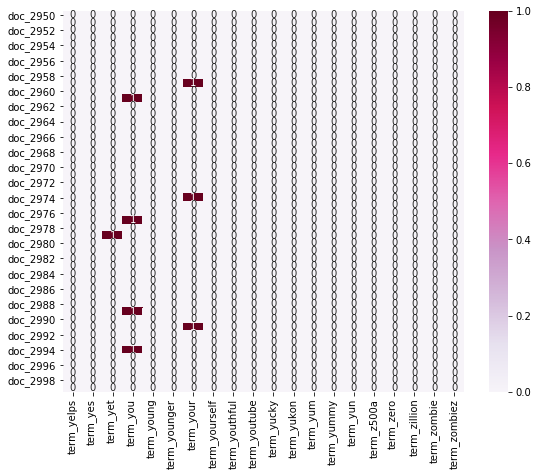

In [47]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[-20:]]
plot_y = ["doc_"+ str(i) for i in list(dfx.index)[-50:]]
plot_z = dfx_counts[-50:, -20:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [48]:
dfx_reduced = PCA(n_components = 2).fit_transform(dfx_counts.toarray())
dfx_reduced.shape

(3000, 2)

In [49]:
dfx.score.unique()

array([0, 1])

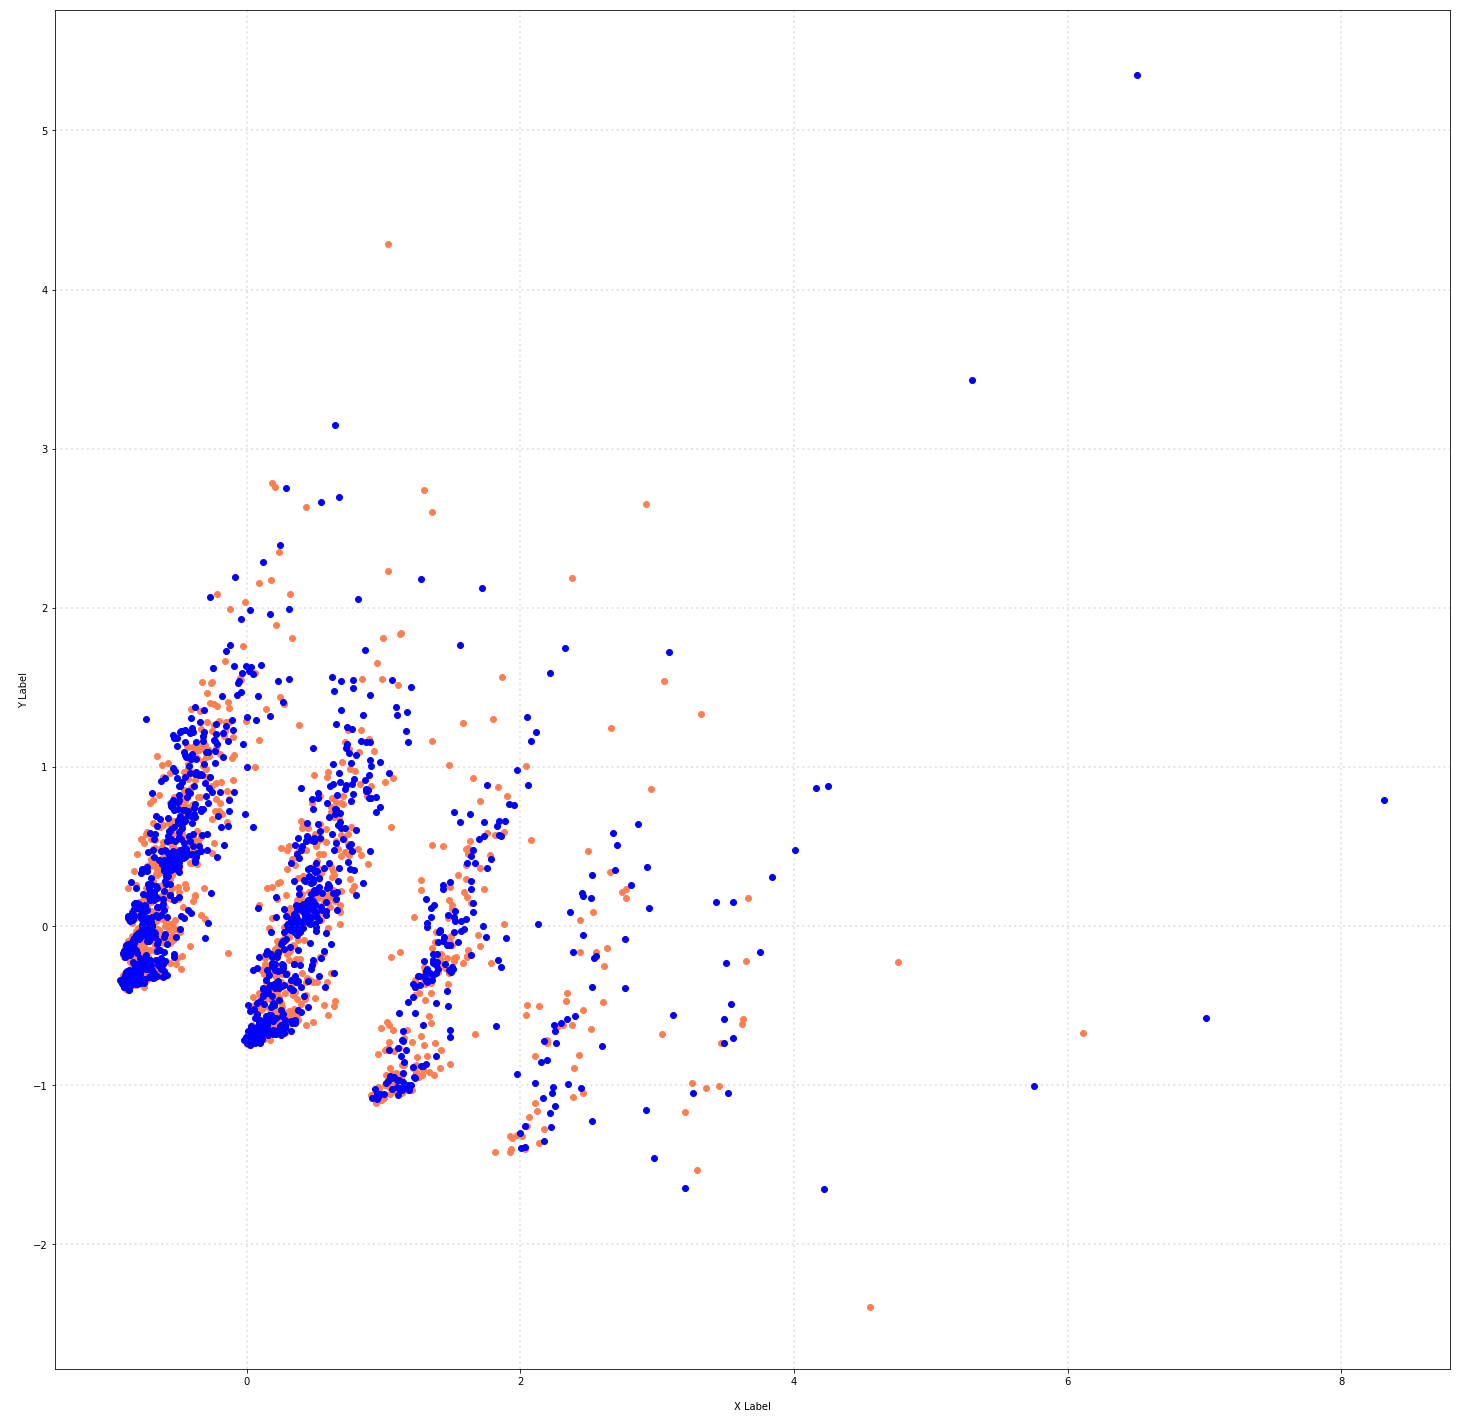

In [50]:
col = ['coral', 'blue', 'm']

# plot
fig = plt.figure(figsize = (25,25))
ax = fig.subplots()

for c, category2 in zip(col, responses):
    xs = dfx_reduced[dfx['response'] == category2].T[0]
    ys = dfx_reduced[dfx['response'] == category2].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

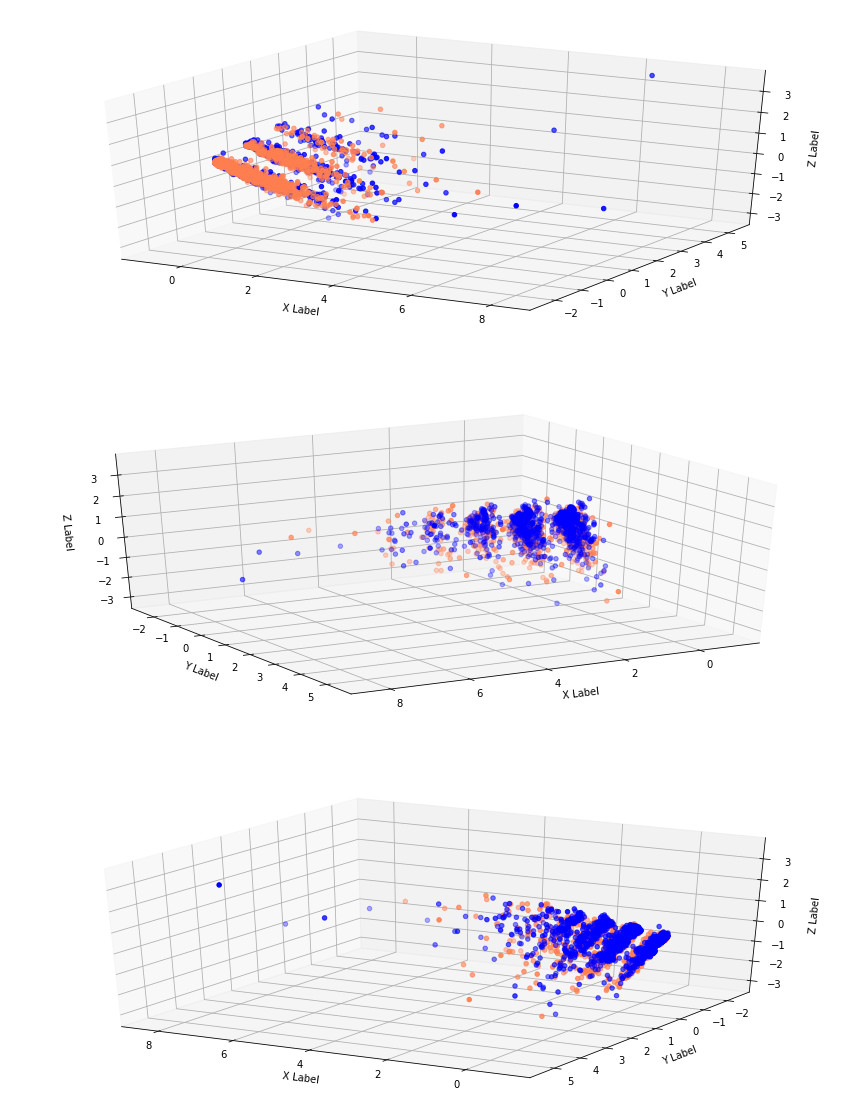

In [51]:
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

dfx_reduced = PCA(n_components = 3).fit_transform(dfx_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# fig = plt.figure(figsize = (25,30))
fig = plt.figure(figsize = (15,20))

ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')


for c, category2 in zip(col, responses):
    xs = dfx_reduced[dfx['response'] == category2].T[0]
    ys = dfx_reduced[dfx['response'] == category2].T[1]
    zs = dfx_reduced[dfx['response'] == category2].T[2]
   
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=30, azim=120)
    
plt.show()

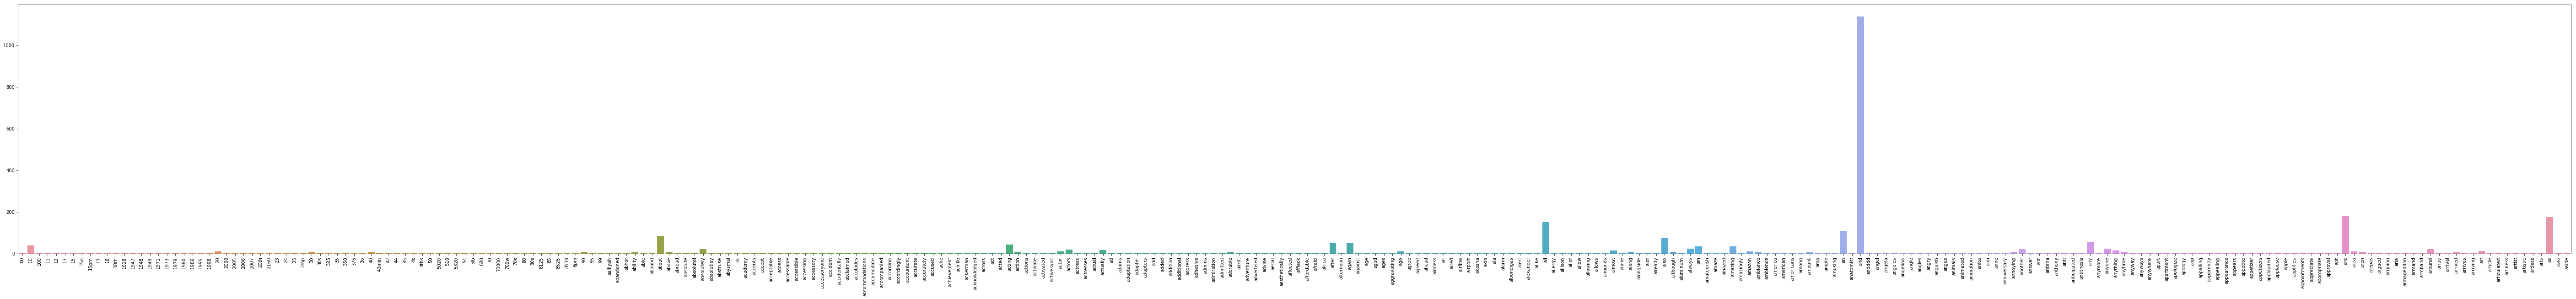

In [52]:
term_frequencies2 = []
for j in range(0,dfx_counts.shape[1]):
    term_frequencies2.append(sum(dfx_counts[:,j].toarray()))
    
term_frequencies2 = np.asarray(dfx_counts.sum(axis=0))[0]
    
# term_frequencies2[0] 
# len(term_frequencies2)

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies2[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [53]:
len(dfx)

3000

In [54]:
dfxlt = pd.DataFrame(count_vect.get_feature_names(), columns=['Feature'])
dfxlt['Frequency'] = term_frequencies2
dfxlt.sort_values(by=['Frequency'], ascending=False, inplace=True)

dfxlt[::50][:20]

,Feature,Frequency
4531,the,1953
5107,would,87
5032,who,50
4973,waste,33
4972,wasn,23
1524,end,19
3851,salad,15
4575,through,13
5137,yet,11
1972,glad,10


In [55]:
term_frequencies2 = np.asarray(dfx_counts.sum(axis=0))[0]

py.iplot(ta.plot_word_frequency([dfxlt.Feature[10::20],dfxlt.Frequency[10::20]], "Term Frequency Distribution"))

/home/pati/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




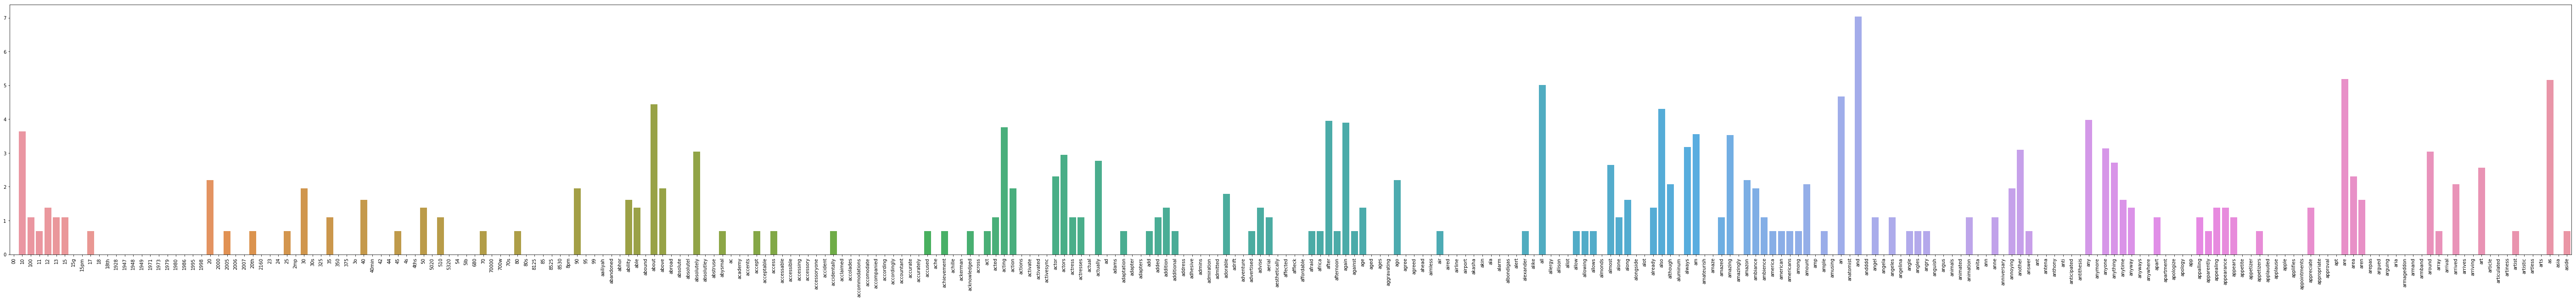

In [56]:
import math
term_frequencies2_log = [math.log(i) for i in term_frequencies2]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies2_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [59]:
# term_frequencies2 = np.asarray(dfx_counts.sum(axis=0))[0]
dfxlt = pd.DataFrame(count_vect.get_feature_names(), columns=['Feature'])
dfxlt['Frequency'] = term_frequencies2_log
dfxlt.sort_values(by=['Frequency'], ascending=False, inplace=True)

py.iplot(ta.plot_word_frequency([dfxlt.Feature,dfxlt.Frequency], "Term Frequency Distribution"))

/home/pati/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




---

## Part 2: New Dataset and New Operations

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
dfx_tfidf = vectorizer.fit_transform(dfx.sentiment)
print(vectorizer.get_feature_names()[::50][:20])

print('\n',dfx_tfidf.shape)

['00', '510', 'accomodate', 'affleck', 'amazed', 'anywhere', 'ask', 'awards', 'baseball', 'bell', 'blandest', 'bose', 'brunch', 'caballero', 'carly', 'cg', 'chewy', 'clichés', 'comforting', 'condescends']

 (3000, 5155)


In [61]:
dfx_tfidf[0:600:30,::350].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

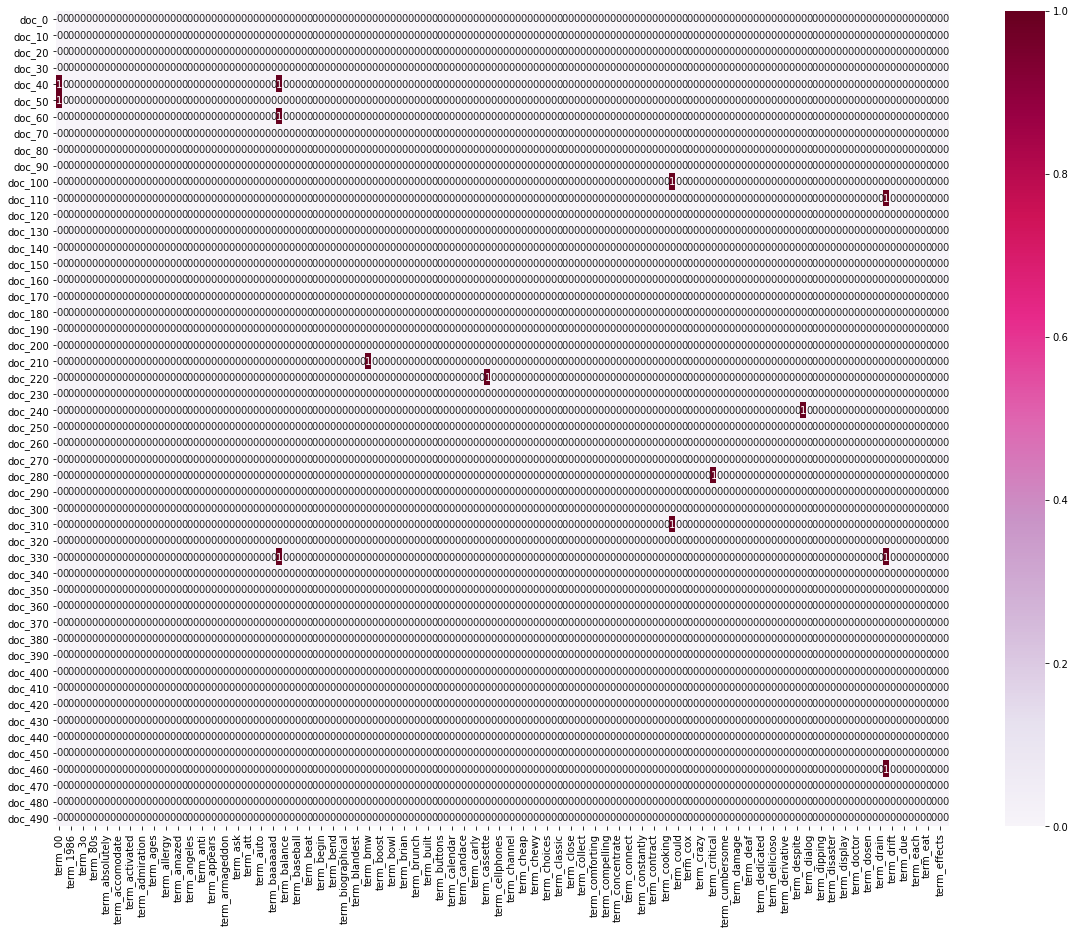

In [62]:
plot_x3 = ["term_"+str(i) for i in vectorizer.get_feature_names()[::10][0:150]]
plot_y3 = ["doc_"+ str(i) for i in list(dfx.index)[::10][:50]]
plot_z3 = X_counts[0:50, 0:150].toarray()

df_todraw3 = pd.DataFrame(plot_z3, columns = plot_x3, index = plot_y3)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw3,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---